## Problem 1 (1 pt)

(i): Neither, Horizontal Sobel Filter

(ii): Lowpass Filter

(iii): Highpass Filter

## Problem 2 (1 pt)

Answer: A **Lowpass Filter** was used for **image output 1** because the image is overall just blurred.
Answer: A **Highpass Filter** was used for **image output 2** because the areas with large blank areas have been removed and places of high frequencies/ edges are highlighted.

## Problem 3 (3 pt)


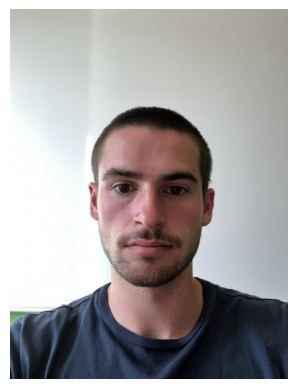

In [2]:
import numpy as np
import matplotlib
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Load the image
image_path = '/Users/benbaize/Desktop/CSCI507/IMG_5088.jpeg' 
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

In [3]:
#Sobil Filter
sobel_vert_filter = np.array([
    [[1, 1, 1], [2, 2, 2], [1, 1, 1]],
    [[0, 0, 0], [0, 0, 0], [0, 0, 0]], #The numbers are repeated three times for the RGB image
    [[-1, -1, -1], [-2, -2, -2], [-1, -1, -1]]
])

#Load Image into Numpy Array
self_image = np.array(image)

In [4]:
#Function for applying filter to image
def filter(image_array,filter):

    filtered_image = np.empty([np.shape(image_array)[0],np.shape(image_array)[1],3]) #Initialize empty new image of same size

    for i in range(1, np.shape(image_array)[0]-1):  
        for j in range(1, np.shape(image_array)[1]-1):
            # 3x3 window applying filter to
            px_grid = np.array([
                [image_array[i-1, j-1], image_array[i, j-1], image_array[i+1, j-1]],
                [image_array[i-1, j],   image_array[i, j],   image_array[i+1, j]],
                [image_array[i-1, j+1], image_array[i, j+1], image_array[i+1, j+1]]
            ])
            #Applying filter to windowed section
            new_px = np.sum(px_grid*filter)
            #Putting filtered Pixel into new image 
            filtered_image[i, j] = new_px
    return filtered_image

In [5]:
#Run the filter through the image
sobel_vert_filtered = filter(self_image,sobel_vert_filter)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


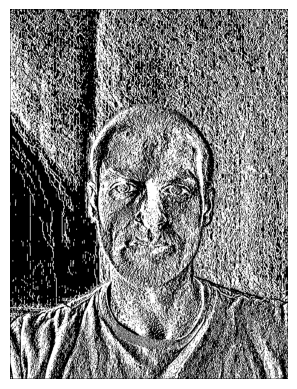

In [6]:
plt.imshow(sobel_vert_filtered)
plt.axis('off')
plt.show()

## Problem 4 (3 pt)

In [ ]:
from scipy.signal import convolve2d

#Convolve image with self, zeros padding, same size output, no padding
grayscale_self_image1 = image.convert('L')
grayscale_self_image = grayscale_self_image1.resize((200, 400), Image.ANTIALIAS)
grayscale_self_image = np.array(grayscale_self_image)

/var/folders/9b/x2ln5s1x0x97knwyr1569h3r0000gn/T/ipykernel_62607/4073762669.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  grayscale_self_image = grayscale_self_image1.resize((200, 400), Image.ANTIALIAS)


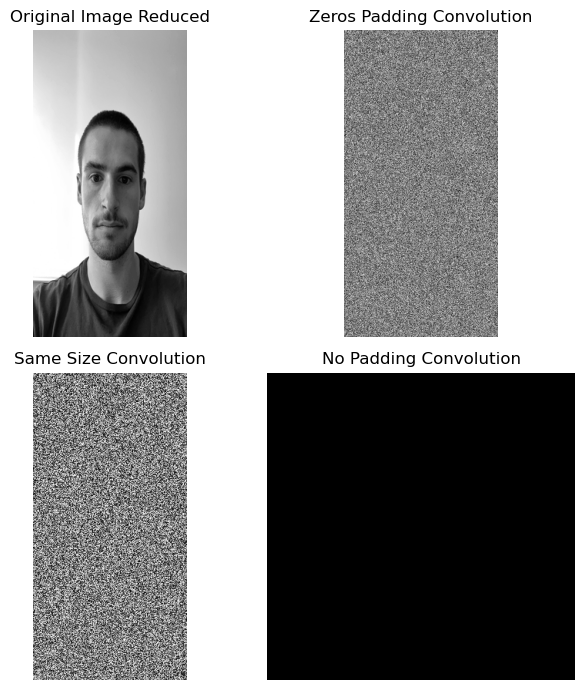

In [44]:
zeros_convolve = convolve2d(grayscale_self_image, grayscale_self_image, mode='full')
samesz_convolve = convolve2d(grayscale_self_image, grayscale_self_image, mode='same')
nopad_convolve = convolve2d(grayscale_self_image, grayscale_self_image, mode='valid')

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
axs[0, 0].imshow(grayscale_self_image, cmap='gray')
axs[0, 0].set_title('Original Image Reduced')
axs[0, 0].axis('off')  

axs[0, 1].imshow(zeros_convolve, cmap='gray')
axs[0, 1].set_title('Zeros Padding Convolution')
axs[0, 1].axis('off') 

axs[1, 0].imshow(samesz_convolve, cmap='gray')
axs[1, 0].set_title('Same Size Convolution')
axs[1, 0].axis('off')  

axs[1, 1].imshow(nopad_convolve, cmap='gray')
axs[1, 1].set_title('No Padding Convolution')
axs[1, 1].axis('off') 

axs[1, 1].axis('off')  

plt.tight_layout()
plt.show()

## Problem 5 (3 pt)

/var/folders/9b/x2ln5s1x0x97knwyr1569h3r0000gn/T/ipykernel_62607/2723069611.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


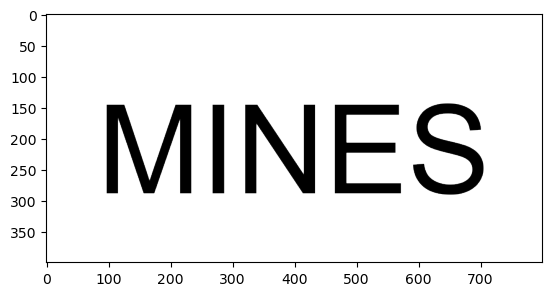

In [37]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import matplotlib.pyplot as plt

text = "MINES"
font_size = 200

font = ImageFont.truetype("arial.ttf", font_size) 

image_width = 800
image_height = 400
text_image = Image.new("RGBA", (image_width, image_height), (255, 255, 255, 0))

draw = ImageDraw.Draw(text_image)
text_width, text_height = draw.textsize(text, font=font)
text_position = ((image_width - text_width) // 2, (image_height - text_height) // 2) #Centering
draw.text(text_position, text, font=font, fill="black") 

plt.imshow(text_image)
plt.show()


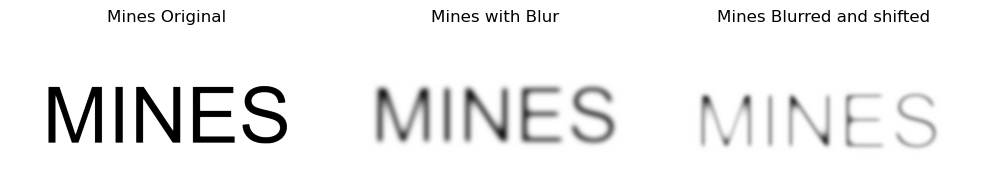

In [39]:
blurred_image = text_image.copy().filter(ImageFilter.GaussianBlur(8)) #Bluring, 8 Radius

shift_x, shift_y = -15, 15 #Image Shifting
shadow_image = Image.new("RGBA", (image_width, image_height), (255, 255, 255, 0))
shadow_image.paste(blurred_image, (shift_x, shift_y), blurred_image)
fig, axs = plt.subplots(1, 3, figsize=(10, 10))

axs[0].imshow(text_image)
axs[0].set_title('Mines Original')
axs[0].axis('off') 

axs[1].imshow(blurred_image)
axs[1].set_title('Mines with Blur')
axs[1].axis('off') 

axs[2].imshow(shadow_image)
axs[2].set_title('Mines Blurred and shifted')
axs[2].axis('off')  # Hide the axes of the empty subplot

# Adjust layout to make sure titles and labels fit well
plt.tight_layout()

# Show the plot
plt.show()

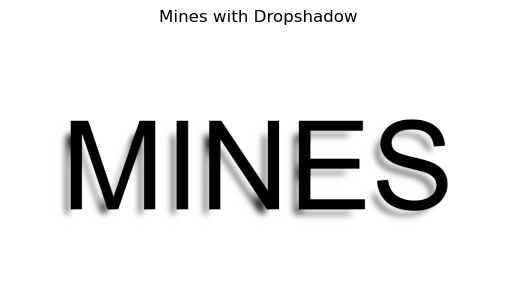

In [42]:
combined_image = Image.alpha_composite(shadow_image, text_image)


plt.imshow(combined_image)
plt.title('Mines with Dropshadow')
plt.axis('off')
plt.show()

## Problem 6 (3 pt)

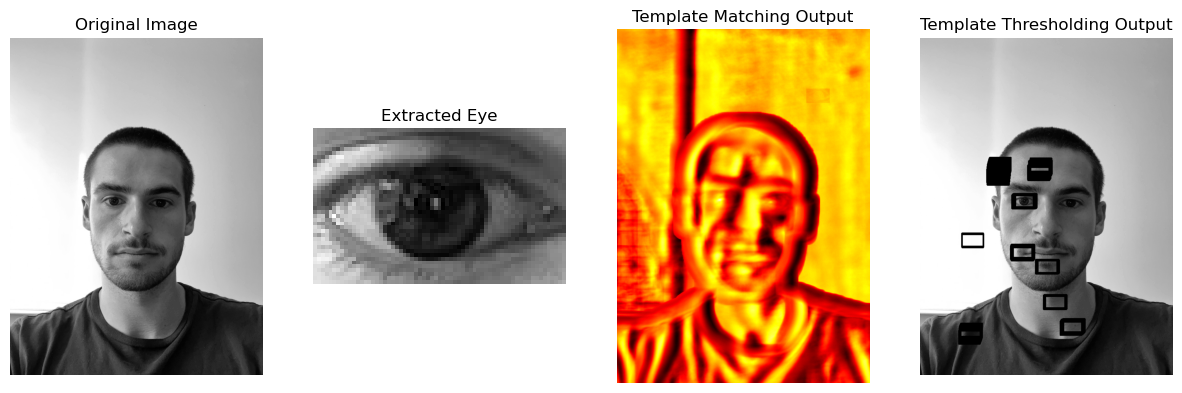

In [73]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

grayscale_self_image = cv.imread('/Users/benbaize/Desktop/CSCI507/IMG_5088.jpeg', cv.IMREAD_GRAYSCALE)

left_eye = grayscale_self_image1[475:515, 285:350] #Manual Location

result = cv.matchTemplate(grayscale_self_image, left_eye, cv.TM_CCOEFF_NORMED)

min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

h, w = left_eye.shape[:2]
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
matched_image = grayscale_self_image1.copy()
cv.rectangle(matched_image, top_left, bottom_right, 255, 2)


w, h = left_eye.shape[::-1]
 
res = cv.matchTemplate(grayscale_self_image,left_eye,cv.TM_CCOEFF_NORMED)
threshold = 0.7
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(grayscale_self_image, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(grayscale_self_image1, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(left_eye, cmap='gray')
axs[1].set_title('Extracted Eye')

axs[2].imshow(result, cmap='hot')
axs[2].set_title('Template Matching Output')

axs[3].imshow(grayscale_self_image, cmap='gray')
axs[3].set_title('Template Thresholding Output')

for ax in axs:
    ax.axis('off')

plt.show()


## Problem 7 (3 pt)

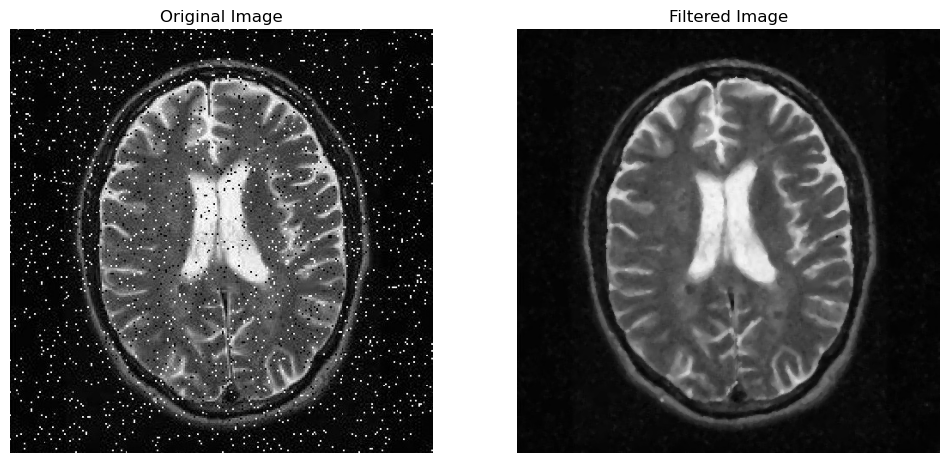

In [74]:
from scipy import ndimage
mri_image_filepath = '/Users/benbaize/Desktop/CSCI507/mri.jpg'
mri = Image.open(mri_image_filepath)

filtered_mri = ndimage.median_filter(mri, size=5)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(mri, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(filtered_mri, cmap='gray')
ax[1].set_title('Filtered Image')
ax[1].axis('off')

plt.show()

## Problem 8 (8 pt)